# Biden Tweets Collection and Exploratory Analysis

## Loading Biden's Tweets

In [1]:
## load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\camde\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
def tokenize(phrase):
    '''
    Returns an array of individual words in the string phrase
    phrase: The string to be tokenized
    '''
    tokens = nltk.word_tokenize(phrase)
    return tokens

In [3]:
# Load Biden's tweets
biden_tweets = pd.read_csv("biden_tweets.csv")
number_of_biden_tweets = len(biden_tweets.index) #Number of tweets we collected
print(biden_tweets.head())
print("Number of tweets: " + str(number_of_biden_tweets))

   Unnamed: 0                   id  \
0           0  1313663334286323714   
1           1  1313652765319557122   
2           2  1313646473393840128   
3           3  1313641691602202624   
4           4  1313633890289045504   

                                           full_text  \
0                    Please. https://t.co/acHR1Rf8hE   
1  I can’t wait for @KamalaHarris to make history...   
2  Ignore the polls, folks. There’s too much at s...   
3  Think about what it takes for a Black person t...   
4  Look, folks, I'm going to be honest: we'll try...   

                                            entities           created_at  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...  2020-10-07 02:12:00   
1  {'hashtags': [], 'symbols': [], 'user_mentions...  2020-10-07 01:30:00   
2  {'hashtags': [], 'symbols': [], 'user_mentions...  2020-10-07 01:05:00   
3  {'hashtags': [], 'symbols': [], 'user_mentions...  2020-10-07 00:46:00   
4  {'hashtags': [], 'symbols': [], 'user_mentions

In [4]:
# Converting create_at column to datetime for later analysis use.
biden_tweets['datetime']=pd.to_datetime(biden_tweets['created_at'], format='%Y-%m-%d %H:%M:%S')
biden_tweets['date']=biden_tweets['datetime'].dt.date

#number of tweets by day

biden_tweetsbyday=biden_tweets.date.value_counts()
print(biden_tweets['date'])
print(biden_tweetsbyday)

biden_dataframetweetsbyday = pd.DataFrame(np.array([biden_tweets['date'], [biden_tweetsbyday]]))

0       2020-10-07
1       2020-10-07
2       2020-10-07
3       2020-10-07
4       2020-10-07
           ...    
3079    2019-10-16
3080    2019-10-16
3081    2019-10-16
3082    2019-10-16
3083    2019-10-16
Name: date, Length: 3084, dtype: object
2020-09-30    39
2019-11-21    35
2020-10-06    31
2020-03-16    27
2020-03-04    27
              ..
2020-01-01     2
2020-05-31     2
2019-12-25     2
2019-12-26     2
2019-11-28     2
Name: date, Length: 358, dtype: int64


## Summary Statistics for Selected Variables

In [5]:
# Summary stats for the "full_text" column
biden_total_words = 0 # The number of words Biden used across all the Tweets we collected
biden_word_counts_list = [] # A list of the word count for each tweet
for tweet in biden_tweets["full_text"]:
    tweet_length = len(tokenize(tweet))
    biden_word_counts_list.append(tweet_length)                 
    biden_total_words += tweet_length
print("Biden words tweeted: " + "{:.0f}".format(biden_total_words))
biden_mean_wordcount = np.mean(biden_word_counts_list)
print("Mean number of words in Biden tweets: " + "{:.2f}".format(biden_mean_wordcount))
biden_median_wordcount = np.median(biden_word_counts_list)
print("Median number of words in Biden tweets: " + "{:.2f}".format(biden_median_wordcount))
biden_mode_wordcount = statistics.mode(biden_word_counts_list)
print("Mode number of words in Biden tweets: " + "{:.0f}".format(biden_mode_wordcount))
biden_minimum_words = min(biden_word_counts_list)
print("The least number of words Biden used in a tweet was: " + "{:.0f}".format(biden_minimum_words))
biden_maximum_words = max(biden_word_counts_list)
print("The most number of words Biden used in a tweet was: " + "{:.0f}".format(biden_maximum_words))
biden_stddev_wordcount = np.std(biden_word_counts_list)
print("Standard deviation of number of words in Biden tweets: " + "{:.2f}".format(biden_stddev_wordcount))

Biden words tweeted: 123036
Mean number of words in Biden tweets: 39.89
Median number of words in Biden tweets: 43.00
Mode number of words in Biden tweets: 48
The least number of words Biden used in a tweet was: 2
The most number of words Biden used in a tweet was: 72
Standard deviation of number of words in Biden tweets: 14.68


In [6]:
# Summary stats for the "favourite" column
biden_favorites = biden_tweets["favourite"]
biden_total_favorites = biden_favorites.sum()
print("Biden tweet favorites: " + "{:.0f}".format(biden_total_favorites))
biden_mean_favorites = np.mean(biden_favorites)
print("Mean number of favorites for Biden tweets: " + "{:.2f}".format(biden_mean_favorites))
biden_median_favorites = np.median(biden_favorites)
print("Median number of favorites for Biden tweets: " + "{:.2f}".format(biden_median_favorites))
# Mode may not be meaningful due to the wide range between the minimum and maximum number of favorites
# biden_mode_favorites = statistics.mode(biden_favorites)
# print("Mode number of favorites in each Biden tweet: " + str(biden_mode_favorites))
biden_minimum_favorites = min(biden_favorites)
print("The least number of favorites a Biden tweet received was: " + "{:.0f}".format(biden_minimum_favorites))
biden_maximum_favorites = max(biden_favorites)
print("The most number of favorites a Biden tweet received was: " + "{:.0f}".format(biden_maximum_favorites))
biden_stddev_favorites = np.std(biden_favorites)
print("Standard deviation of number of favorites for Biden tweets: " + "{:.2f}".format(biden_stddev_favorites))

Biden tweet favorites: 146530712
Mean number of favorites for Biden tweets: 47513.20
Median number of favorites for Biden tweets: 19678.50
The least number of favorites a Biden tweet received was: 34
The most number of favorites a Biden tweet received was: 1890801
Standard deviation of number of favorites for Biden tweets: 92504.77


In [7]:
# Summary stats for the "retweets" column
biden_retweets = biden_tweets["retweets"]
biden_total_retweets = biden_retweets.sum()
print("Biden retweets: " + "{:.0f}".format(biden_total_retweets))
biden_mean_retweets = np.mean(biden_retweets)
print("Mean number of retweets for Biden tweets: " + "{:.2f}".format(biden_mean_retweets))
biden_median_retweets = np.median(biden_retweets)
print("Median number of retweets for Biden tweets: " + "{:.2f}".format(biden_median_retweets))
# Mode may not be meaningful due to the wide range between the minimum and maximum number of retweets
# biden_mode_retweets = statistics.mode(biden_retweets)
# print("Mode number of retweets in each Biden tweet: " + str(biden_mode_retweets))
biden_minimum_retweets = min(biden_retweets)
print("The least number of retweets a Biden tweet received was: " + "{:.0f}".format(biden_minimum_retweets))
biden_maximum_retweets = max(biden_retweets)
print("The most number of retweets a Biden tweet received was: " + "{:.0f}".format(biden_maximum_retweets))
biden_stddev_retweets = np.std(biden_retweets)
print("Standard deviation of number of retweets for each Biden tweet: " + "{:.2f}".format(biden_stddev_retweets))

Biden retweets: 27712385
Mean number of retweets for Biden tweets: 8985.86
Median number of retweets for Biden tweets: 4409.00
The least number of retweets a Biden tweet received was: 11
The most number of retweets a Biden tweet received was: 327830
Standard deviation of number of retweets for each Biden tweet: 15350.52


In [8]:
# Statistics for "language" column
biden_language_counts = biden_tweets["language"].value_counts()
print("Raw number of tweets in each language: " + "\n" + str(biden_language_counts))
print("Percent of tweets in each language: " + "\n" + str(100 * biden_language_counts / 
    number_of_biden_tweets)) # Percentage breakdown of each language



Raw number of tweets in each language: 
en     3055
es       19
und       8
ro        1
fr        1
Name: language, dtype: int64
Fraction of tweets in each language: 
en     99.059663
es      0.616083
und     0.259403
ro      0.032425
fr      0.032425
Name: language, dtype: float64


Thoughts: The sample size for tweets in languages other than english is likely too small to make any meaningful conclusions about those tweets

## Distributions of Variables

### Histograms

Text(0.5, 0, 'Number of Words')

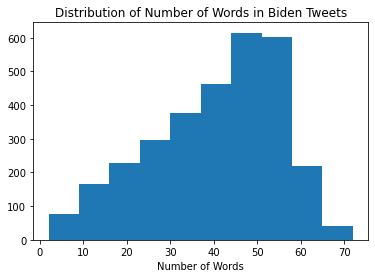

In [9]:
# Number of words

plt.hist(biden_word_counts_list)
plt.title("Distribution of Number of Words in Biden Tweets")
plt.xlabel("Number of Words")

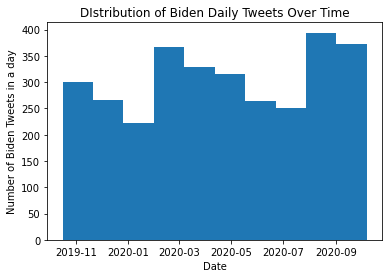

In [10]:
# Tweets per day

plt.hist(biden_tweets['date'])
plt.xlabel('Date')
plt.ylabel('Number of Biden Tweets in a day')
plt.title("DIstribution of Biden Daily Tweets Over Time")
plt.show()

Text(0.5, 0, 'Favorites')

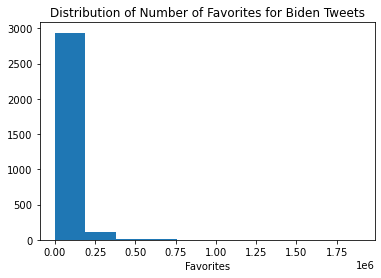

In [11]:
# Favorites

plt.hist(biden_favorites)
plt.title("Distribution of Number of Favorites for Biden Tweets")
plt.xlabel("Favorites")

Text(0.5, 0, 'Favorites')

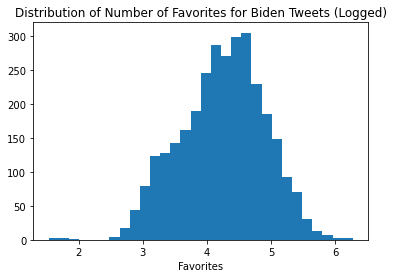

In [12]:
# Favorites logged

biden_favouritelogged=biden_tweets.copy()
biden_favouritelogged['favourite']=np.log10(biden_favouritelogged['favourite'])
plt.hist(biden_favouritelogged["favourite"], bins = 30)
plt.title("Distribution of Number of Favorites for Biden Tweets (Logged)")
plt.xlabel("Favorites")

Text(0.5, 0, 'Number of Retweets')

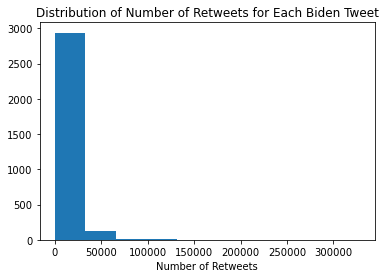

In [13]:
# Retweets

plt.hist(biden_retweets)
plt.title("Distribution of Number of Retweets for Each Biden Tweet")
plt.xlabel("Number of Retweets")

Text(0.5, 0, 'Number of Retweets')

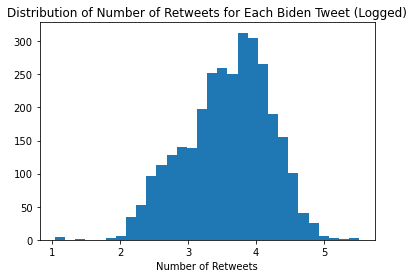

In [14]:
# Retweets logged

biden_retweetslogged=biden_tweets.copy()
biden_retweetslogged['retweets']=np.log10(biden_retweetslogged['retweets'])
plt.hist(biden_retweetslogged["retweets"], bins = 30)
plt.title("Distribution of Number of Retweets for Each Biden Tweet (Logged)")
plt.xlabel("Number of Retweets")

### Boxplots

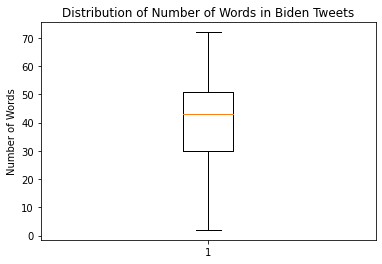

In [15]:
# Number of Words

plt.boxplot(biden_word_counts_list)
plt.title("Distribution of Number of Words in Biden Tweets")
plt.ylabel("Number of Words")
plt.show()

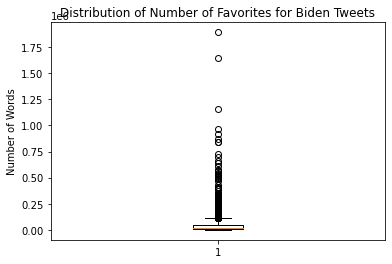

In [16]:
# Favorites

plt.boxplot(biden_favorites)
plt.title("Distribution of Number of Favorites for Biden Tweets")
plt.ylabel("Number of Words")
plt.show()

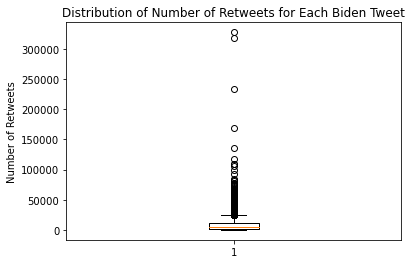

In [17]:
# Retweets

plt.boxplot(biden_retweets)
plt.title("Distribution of Number of Retweets for Each Biden Tweet")
plt.ylabel("Number of Retweets")
plt.show()

### Plotting Multiple Variables Together

Text(0.5, 0, 'Number of Words')

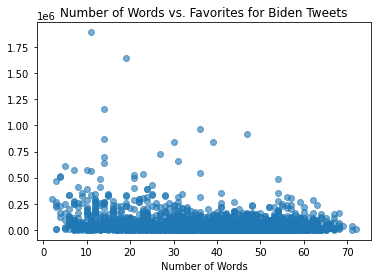

In [18]:
# Number of Words vs. Favorites

plt.scatter(x = biden_word_counts_list, y = biden_favorites, alpha = 0.6)
plt.title("Number of Words vs. Favorites for Biden Tweets")
plt.xlabel("Number of Words")

Text(0.5, 0, 'Number of Words in Tweet')

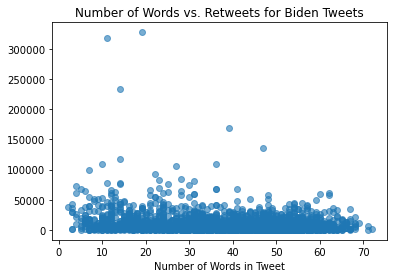

In [19]:
# Number of Words vs. Retweets

plt.scatter(x = biden_word_counts_list, y = biden_retweets, alpha = 0.6)
plt.title("Number of Words vs. Retweets for Biden Tweets")
plt.xlabel("Number of Words in Tweet")

Text(0.5, 0, 'Number of Words in Tweet')

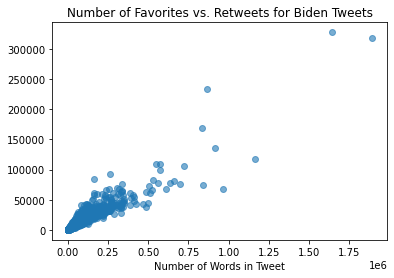

In [20]:
# Number of Favorites vs. Retweets for Biden Tweets

plt.scatter(x = biden_favorites, y = biden_retweets, alpha = 0.6)
plt.title("Number of Favorites vs. Retweets for Biden Tweets")
plt.xlabel("Number of Words in Tweet")

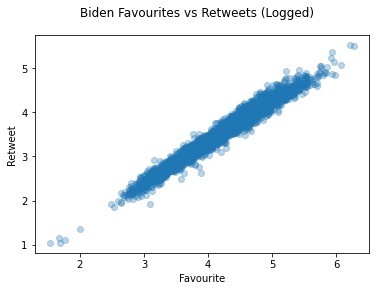

In [21]:
# Logged favorites vs. retweets

plt.scatter(biden_favouritelogged.favourite, biden_retweetslogged.retweets, alpha=0.3)
plt.xlabel('Favourite')
plt.ylabel('Retweet')
plt.suptitle('Biden Favourites vs Retweets (Logged)')
plt.show()